In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

# Parte di Matteo per il setup

In [2]:
from functions import load_graph_1, load_graph_2 , top_N_filter

graph1 = load_graph_1()
graph2 = load_graph_2()


# Functionality 2 - Find top superheroes!

In [1]:
from functions import clean_comm

In [5]:
def functionality_2(graph, node, metric, N=6439):

    graph = top_N_filter(graph, N)

    metric = clean_comm(metric)
    result = eval(f'nx.{metric}(graph)[node]')
    return (node, result)

In [6]:
functionality_2(graph1, "ZURI", "DegreeCentrality")

('ZURI', 0.015264797507788162)

# Algorithmic question

In [220]:
# initialize the phone lock grid screen
G = nx.Graph()
G.add_nodes_from(np.arange(1,10)) # each node of our graph represetns a ponit                                  
edges = []                          # in the the lock scren
for i in G.nodes():
    neighbours = []                
    if i % 3 != 0:
        neighbours.append((i,i+1))
    if i not in [7,8,9]:
        neighbours.append((i,i+3))
    if i in [1,4,7]:
        neighbours.append((i,i+2))
    if i in [1,2,3]:
        neighbours.append((i,i+6))
        
    G.add_edges_from(neighbours)      # each edge correspond to a valid move


nodes = list(G.nodes())
edges = list(G.edges())


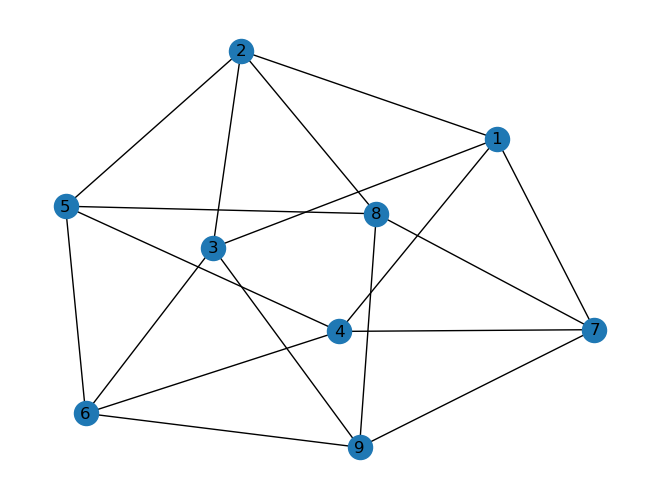

In [227]:
plt.clf()
nx.draw(G, with_labels=True)
plt.show()

In [225]:
def check_not_in(nodi, lista):
    lista = np.array(lista, dtype=np.int8)
    return np.all(np.isin(nodi, lista, invert=True) == True)


def find_path(node,edges, commands, step, vis, ):
    
    # base case of the recursion
    if len(commands)==0 and node not in vis:  # if we can read every command we found a valid pattern (path)
        vis.append(node)
        return 1 

    elif len(commands) == 0: # control in case we find a cycle at the last move -> this is not valid
        return 0
        
    # take the first command in our string with the sequence of commands
    command = commands[0]

    # check condition to go backwards in the path based on where we are in the recursion 
    if vis != []:
        try:
            idx = vis.index(node)
            vis = vis[:idx]
        except:
            vis = vis
    
    # notice that a step U or D conncets nodes with a distance 3 or 6 in terms of labels of nodes!
    # a step R or L connects nodes with distance 1 or 2 in terms of labels 
    # rember that the graph is built in order to avoid edges on "diagonal" direction

    # now accroding to the command we proceed with a particular "direction" on our screen
    if command == "U" :

        # pick the nodes where I pass through when moving on the "legal" direction
        next = np.array([node -3*step, node -3*int(step/2)] if step==2 else [node -3*step])

        # in order to avoid any cycle we control that the next node is not in the visited set of nodes
        # check if the move is a "legal" move, i.e. the edge between the current node and next does exist
        if check_not_in(next, vis) and (tuple(sorted((node, next[0]))) in edges):
            vis.append(node)   # add the current node to the list of visited nodes

            # do the same for the nodes that I need to overtake in order to reach the next position
            if len(next)>1:             
                vis.append(next[1])    # to control that we don't have any intersection on a specific pattern
            
            # proceed with the recursion both moving on the given direction with a single and a "double" step
            return find_path(next[0], edges, commands[1:], 1, vis) + find_path(next[0], edges, commands[1:], 2, vis) 

    elif command == "D":
        next = np.array([node +3*step, node +3*int(step/2)] if step==2 else [node +3*step])
        if check_not_in(next, vis) and (tuple(sorted((node, next[0]))) in edges):
            vis.append(node)
            if len(next)>1:  # note that this command works only in case of double-step move
                vis.append(next[1])
            return find_path(next[0], edges, commands[1:], 1, vis) + find_path(next[0], edges, commands[1:], 2, vis)
    
    elif command == "L":
        next = np.array([node -1*step, node -1*int(step/2)] if step==2 else [node -1*step])
        if check_not_in(next, vis) and (tuple(sorted((node, next[0]))) in edges):
            vis.append(node)
            if len(next)>1:
                vis.append(next[1])
            return find_path(next[0], edges, commands[1:], 1, vis) + find_path(next[0], edges, commands[1:], 2, vis)

    elif command == "R":
        next = np.array([node +1*step, node +1*int(step/2)] if step==2 else [node +1*step])
        if check_not_in(next, vis) and (tuple(sorted((node, next[0]))) in edges):
            vis.append(node)
            if len(next)>1:
                vis.append(next[1])
            return find_path(next[0], edges, commands[1:], 1, vis) + find_path(next[0], edges, commands[1:], 2, vis)

    return 0



def count_patt( commands, nodes, edges):

    # we do not want to input commands representing the same movement in sequence (it would not make sense)
    commands = "".join(OrderedDict.fromkeys(commands))

    # or commands that are not informative of any direction
    for c in commands:
        if c not in "RLUD":
            print(f'command {c} not valid!')
            return 0

    # count all the "possible" patterns given the commands
    count = 0
    for n in nodes:
        count += find_path( n,edges, commands, step=1, vis=[])
        count += find_path( n,edges, commands, step=2, vis=[])
    return count

In [226]:
# reading in input the tentative commands
commands = input()


print(f'For the sequence of commands "{commands}" we have {count_patt(commands, nodes, edges)} possible paths.')

For the sequence of commands "DRU" we have 15 possible paths.
